# PySpark SQL

PySpark SQL is a very important and most used module that is used for structured data processing. PySpark SQL allows you to query structured data using either SQL or DataFrame API.

The `pyspark.sql` is a module in PySpark that is used to perform SQL-like operations on the data stored in memory.

The `pyspark.sql.SparkSession` is the main entry point for DataFrame and SQL functionality.

PySpark SQL provides several benefits:

1. **Consistent data access**: SQL supports a shared way to access a variety of data sources like Hive, Avro, Parquet, JSON, and JDBC.
2. **Incorporation with Spark**: PySpark SQL queries are integrated with Spark programs.
3. **Standard connectivity**.
4. **User-Defined Functions**.
5. **Hive compatibility**.
6. **Ease of use**: Spark SQL provides a simple interface making it easier for data scientists and engineers to work with large datasets.
7. **Performance**.
8. **Support for different data sources**.
9. **Readable code for data manipulation**.
10. **Speed for big data as well as Machine Learning**.

In addition, PySpark is easier to test and more composable than SQL. It also allows you to compose an ETL process in an exploratory fashion, making changes as you go. This is due to PySpark's lazy evaluation, which is a feature of Spark in general.


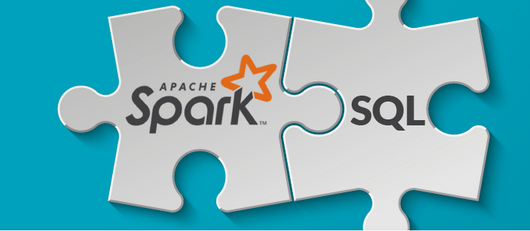

#### Import the necessary libraries.

In [6]:
# Import the findspark library to locate and initialize Spark
import findspark
findspark.init()

# Import necessary components from PySpark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [7]:
# Create or get a SparkSession
spark = SparkSession.builder.getOrCreate()


In [4]:
data_path="/content/drive/MyDrive/departuredelays.csv"

In [8]:
#read the csv file
df = spark.read.csv(data_path,header=True)

In [14]:
#Display the first five rows in the dataset
df.show(5)

+-----+------+----+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|YEAR_|MONTH_|DAY_|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+-----+------+----+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+-

In PySpark, the `createOrReplaceTempView` method is used to create or replace a temporary SQL view based on a DataFrame.

In [15]:
# Create a temporary SQL view named "us_flight_delay" using the DataFrame 'df'
df.createOrReplaceTempView("us_flight_delay")

 #### Running SQL Queries

 Raw SQL queries can also be used by enabling the “sql” operation on our SparkSession to run SQL queries programmatically and return the result sets as DataFrame structures.

##### SQL Select query

In [17]:
# Execute an SQL query to select all columns from the temporary SQL view 'us_flight_delay'
spark.sql("SELECT * FROM us_flight_delay")

DataFrame[YEAR_: string, MONTH_: string, DAY_: string, DAY_OF_WEEK: string, AIRLINE: string, FLIGHT_NUMBER: string, TAIL_NUMBER: string, ORIGIN_AIRPORT: string, DESTINATION_AIRPORT: string, SCHEDULED_DEPARTURE: string, DEPARTURE_TIME: string, DEPARTURE_DELAY: string, TAXI_OUT: string, WHEELS_OFF: string, SCHEDULED_TIME: string, ELAPSED_TIME: string, AIR_TIME: string, DISTANCE: string, WHEELS_ON: string, TAXI_IN: string, SCHEDULED_ARRIVAL: string, ARRIVAL_TIME: string, ARRIVAL_DELAY: string, DIVERTED: string, CANCELLED: string, CANCELLATION_REASON: string, AIR_SYSTEM_DELAY: string, SECURITY_DELAY: string, AIRLINE_DELAY: string, LATE_AIRCRAFT_DELAY: string, WEATHER_DELAY: string]

###### SQL where

In [25]:
# Select the columns DISTANCE, ORIGIN_AIRPORT, and DESTINATION_AIRPORT from the view.
# Apply a filter to only include rows where DISTANCE is greater than 1000.
# Sort the resulting DataFrame in descending order based on the DISTANCE column.
# Show the top 8 rows of the resulting DataFrame.
spark.sql("""
SELECT DISTANCE, ORIGIN_AIRPORT,DESTINATION_AIRPORT
FROM us_flight_delay
WHERE DISTANCE > 1000
""").show(8)

+--------+--------------+-------------------+
|DISTANCE|ORIGIN_AIRPORT|DESTINATION_AIRPORT|
+--------+--------------+-------------------+
|    1448|           ANC|                SEA|
|    2330|           LAX|                PBI|
|    2296|           SFO|                CLT|
|    2342|           LAX|                MIA|
|    1448|           SEA|                ANC|
|    1589|           SFO|                MSP|
|    1299|           LAS|                MSP|
|    2125|           LAX|                CLT|
+--------+--------------+-------------------+
only showing top 8 rows



##### SQL ORDER BY

In [24]:
# Select flights with AIRLINE_DELAY > 120.
# Display columns AIRLINE_DELAY, ORIGIN_AIRPORT, and DESTINATION_AIRPORT.
# Sort the results by AIRLINE_DELAY in descending order.
# Show the top 10 rows of the resulting DataFrame.
spark.sql("""
SELECT AIRLINE_DELAY, ORIGIN_AIRPORT,DESTINATION_AIRPORT
From us_flight_delay
where AIRLINE_DELAY > 120
order by AIRLINE_DELAY desc
""").show(10)

+-------------+--------------+-------------------+
|AIRLINE_DELAY|ORIGIN_AIRPORT|DESTINATION_AIRPORT|
+-------------+--------------+-------------------+
|        364.0|           LAW|                DFW|
|        264.0|           FAT|                DEN|
|        224.0|           TYS|                ORD|
|        205.0|           DFW|                LAS|
|        196.0|           BOI|                IAH|
|        179.0|           PSP|                SFO|
|        170.0|           SFO|                ATL|
|        164.0|           PHL|                DFW|
|        133.0|           CLE|                LGA|
|        131.0|           BOS|                JAX|
+-------------+--------------+-------------------+
only showing top 10 rows



In [33]:
# SQL GROUP BY clause
# Count the occurrences of each unique ORIGIN_AIRPORT.
# Group the results by ORIGIN_AIRPORT.
# Display the ORIGIN_AIRPORT and the corresponding count.
spark.sql("""
SELECT ORIGIN_AIRPORT,COUNT(*) as count
FROM us_flight_delay
GROUP BY ORIGIN_AIRPORT

""").show(5)

+--------------+-----+
|ORIGIN_AIRPORT|count|
+--------------+-----+
|           PSE|    3|
|           INL|    1|
|           MSY|   15|
|           GEG|    5|
|           SNA|   17|
+--------------+-----+
only showing top 5 rows



This notebook is a comprehensive guide to PySpark's SQL module. It covers the fundamental concept of PySpark SQL, explores its advantages, highlights key classes within the module, and provides a step-by-step tutorial on performing SQL-like operations both on DataFrames and temporary tables.